# t-SNE in Python

In this tutorial you will learn:
1. What is t-SNE?
   * How does t-SNE work?
2. Scikit-learn function for t-SNE
   * Hyperparameter tuning
3. Example of implementation

## What is t-SNE?

*t-SNE stands for t-distributed Stochastic Neighbours Embedding. It is a non linear machine learning algorithm that is used for visualising high dimensional data by reducing its dimensionality.*

What is dimensionality reduction?
Dimensionality reduction is the process of representing a multidimensional dataset, i.e, a dataset with multiple features correlated to each other, in only 2 or 3 dimensions.

It is done primarily because visualising and making sense of multidimensional data can be very tedious and a lot of times its not possible to see all the features on one plot.

But now there's another question that comes into mind. Why use t-SNE? Traditionally, PCA is used as a dimensionality reduction technique. Infact, most machine learning courses will teach you about PCA but not t-SNE. 
One of the reasons is that t-SNE is relatively new (developed in 2008) compared to PCA (developed in 1993).

But the main reason behind using t-SNE is the limitation of PCA, a linear algorithm. PCA tries to preserve the variance of dataset in low dimension but doesn't preserve the distance between different clusters. So when dataset is visualised by reducing dimensions, the clusters are crowded together. This is commonly called *'overcrowding'*

### How does t-SNE work?
t-SNE is non linear and it works on the principle of optimizing the distance between similar datapoints in low dimension by following the distance between them in high dimension. In simpler terms try to understand this as:

1. The distance between two similar datapoints in a 3D space is converted to a probability P, where P stands for the probability that both points will be neighbours.
2. Similarly, the distance between two similar datapoints in the 2D space is converted to probability p.

What t-SNE tries to do is minimize the difference between P and p, for all datapoints, and thus create an accurate low dimensional model of the dataset.

The difference between this probabilities is measured by using **Kullback-Liebler divergence (KL)**. Usually, the KL divergence is miniised by using gradient descent algorithm.

Let's take a look at the scikit-learn function for t-SNE.

## Scikit-learn function for t-SNE

The function `TSNE` can be imported from the library `sklearn.manifold`. The scikit-learn documentation describes t-SNE as:

"*t-SNE is a tool to visualize high-dimensional data. It converts similarities between data points to joint probabilities and tries to minimize the Kullback-Leibler divergence between the joint probabilities of the low-dimensional embedding and the high-dimensional data.* *t-SNE has a cost function that is not convex, i.e. with different initializations we can get different results*

You already know about how t-SNE works to minimize the KL divergence between probabilities. What is non-convex cost function?

The cost function to be minimised here is the KL divergence function that will take in probabilities of low and high dimensional data.
A non-convex cost function basically means if plotted, the graph of cost function has more than one minima. Thus we will get a different result for each minima, which is why scikit-learn states that different initialisations will lead to different results.

### Hyperparameter tuning

The various hyperparameters of `TSNE` function have been summarised below:

1. **n_components:int, optional (default: 2)** - Dimension of the embedded (low dimensional) space.


2. **perplexity:float, optional (default: 30)** - The perplexity is related to the number of nearest neighbors that is used in other manifold learning algorithms. Larger datasets usually require a larger perplexity. Consider selecting a value between 5 and 50. Different values can result in significanlty different results.


3. **early_exaggeration:float, optional (default: 12.0)** - Controls how tight natural clusters in the original space are in the embedded space and how much space will be between them. For larger values, the space between natural clusters will be larger in the embedded space. Again, the choice of this parameter is not very critical. If the cost function increases during initial optimization, the early exaggeration factor or the learning rate might be too high.


4. **learning_rate:float, optional (default: 200.0)** - The learning rate for t-SNE is usually in the range [10.0, 1000.0]. If the learning rate is too high, the data may look like a ‘ball’ with any point approximately equidistant from its nearest neighbours. If the learning rate is too low, most points may look compressed in a dense cloud with few outliers. If the cost function gets stuck in a bad local minimum increasing the learning rate may help.


5. **n_iter:int, optional (default: 1000)** - Maximum number of iterations for the optimization. Should be at least 250.


## Example of Implementation

We will be implementing t-SNE on the digits dataset available on sklearn. The aim is to divide digits in the datasets into clusters of similar digits grouped together. We will also be visualising this data using PCA, to understand the limitation of PCA and why t-SNE is preferred over it.

In [1]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import (manifold, datasets, decomposition, ensemble,
                     discriminant_analysis, random_projection, neighbors)

digits = datasets.load_digits(n_class=6)
X = digits.data
y = digits.target
n_samples, n_features = X.shape
n_neighbors = 30

Text(0.5, 1.0, 'A selection from the 64-dimensional digits dataset')

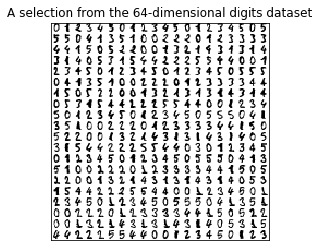

In [2]:
# Plot images of the digits (dataset)
n_img_per_row = 20
img = np.zeros((10 * n_img_per_row, 10 * n_img_per_row))
for i in range(n_img_per_row):
    ix = 10 * i + 1
    for j in range(n_img_per_row):
        iy = 10 * j + 1
        img[ix:ix + 8, iy:iy + 8] = X[i * n_img_per_row + j].reshape((8, 8))

plt.imshow(img, cmap=plt.cm.binary)
plt.xticks([])
plt.yticks([])
plt.title('A selection from the 64-dimensional digits dataset')


In [3]:
# Scale and visualize the embedding vectors
def plot_embedding(X, title=None):
    x_min, x_max = np.min(X, 0), np.max(X, 0)
    X = (X - x_min) / (x_max - x_min)

    plt.figure()
    ax = plt.subplot(111)
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(y[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

    if hasattr(offsetbox, 'AnnotationBbox'):
        shown_images = np.array([[1., 1.]])  # just something big
        for i in range(X.shape[0]):
            dist = np.sum((X[i] - shown_images) ** 2, 1)
            if np.min(dist) < 4e-3:
                # don't show points that are too close
                continue
            shown_images = np.r_[shown_images, [X[i]]]
            imagebox = offsetbox.AnnotationBbox(
                offsetbox.OffsetImage(digits.images[i], cmap=plt.cm.gray_r),
                X[i])
            ax.add_artist(imagebox)
    plt.xticks([]), plt.yticks([])
    if title is not None:
        plt.title(title)

Computing PCA projection


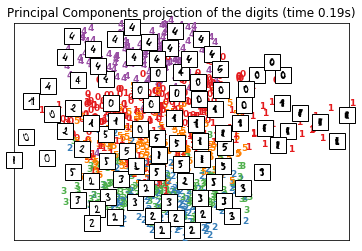

In [5]:
print("Computing PCA projection")
t0 = time()
X_pca = decomposition.TruncatedSVD(n_components=2).fit_transform(X)
plot_embedding(X_pca,
               "Principal Components projection of the digits (time %.2fs)" %
               (time() - t0))

Computing t-SNE embedding


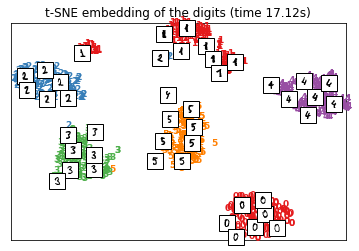

In [6]:
# t-SNE embedding of the digits dataset
print("Computing t-SNE embedding")
tsne = manifold.TSNE(n_components=2, init='pca', random_state=0)
t0 = time()
X_tsne = tsne.fit_transform(X)

plot_embedding(X_tsne,
               "t-SNE embedding of the digits (time %.2fs)" %
               (time() - t0))


You can see how well t-SNE visualizes the clusters present in the dataset, compared to PCA.

The only problem with PCA is it's computation. It uses up a lot of system resources and is significantly more complex than PCA, which makes it very slow.

## References

1. Scikit-Learn [documentation](https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html#sphx-glr-auto-examples-manifold-plot-lle-digits-py)
2. Towards Data Science [blog](https://towardsdatascience.com/an-introduction-to-t-sne-with-python-example-5a3a293108d1)